## Organisation :
Dans ce second notebook, on souhaite comprendre et interpréter les données des études cliniques extraites dans le notebook précédent, notamment en générant des visualisations.

- On importe les données extraites dans le notebook précédent
- On vérifie la cohérence des données
- Génération des visualisations et repérage des données problématiques:
   
    + Champ 'HasResults'
    + Publications par type et par année
    + Délai entre la publication et la fin de l'étude
    + Délai entre la publication et le début de l'étude
    + Passages des données problématiques en type 'SUSPICIOUS'
    + Durée des études cliniques

- Statistiques
- Export pour un traitement manuel

Installer seaborn, si il n'est pas déjà présent:

`python -m pip install seaborn`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import de la DataFrame :

In [2]:
df_extract = pd.read_csv(
    'Data/outputs/df_extract.csv', sep=';', encoding='utf-8-sig'
)
# df_extract.info()

In [3]:
df_extract = df_extract.astype(
    {
        'OverallStatus': 'category',
        'StudyType': 'category', 
        'type': 'category',
    }
)
df_extract = df_extract.astype(
    {
        'StudyFirstPostDate': 'datetime64[ns]',
        'StartDate': 'datetime64[ns]',
        'CompletionDate': 'datetime64[ns]',
    }
)
df_extract = df_extract.convert_dtypes()
df_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   NCTId               498 non-null    string        
 1   BriefTitle          498 non-null    string        
 2   LeadSponsorName     498 non-null    string        
 3   CollaboratorName    224 non-null    string        
 4   OverallStatus       498 non-null    category      
 5   StudyType           498 non-null    category      
 6   HasResults          498 non-null    boolean       
 7   StudyFirstPostDate  498 non-null    datetime64[ns]
 8   StartDate           498 non-null    datetime64[ns]
 9   CompletionDate      498 non-null    datetime64[ns]
 10  pmid                392 non-null    Int64         
 11  type                392 non-null    category      
 12  title               392 non-null    string        
 13  authors             392 non-null    string        

In [4]:
df_extract

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,year,publication_types
0,NCT03671291,Missed Opportunities to Pre-exposure Prophylax...,French National Agency for Research on AIDS an...,"University Hospital, Marseille | University Ho...",COMPLETED,INTERVENTIONAL,False,2018-09-14,2019-04-03,2021-10-03,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
1,NCT00323804,Interest of Ribavirin in the Maintenance Treat...,"ANRS, Emerging Infectious Diseases",Merck Sharp & Dohme LLC | Rennes University Ho...,COMPLETED,INTERVENTIONAL,False,2006-05-10,2006-05-01,2013-03-01,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
2,NCT02267304,"Double Blind Randomized, Monocentric, Cross-ov...",Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2014-10-17,2013-10-30,2016-08-30,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
3,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,"ANRS, Emerging Infectious Diseases",Institut de Recherche pour le Developpement | ...,COMPLETED,INTERVENTIONAL,False,2016-05-19,2016-07-01,2021-07-01,38156046,PUBMED,Durability of the Efficacy and Safety of Dolut...,Mpoudi-Etame M; Tovar Sanchez T; Bousmah MA; O...,10.1093/ofid/ofad582,2023,['Journal Article']
4,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,"ANRS, Emerging Infectious Diseases",Institut de Recherche pour le Developpement | ...,COMPLETED,INTERVENTIONAL,False,2016-05-19,2016-07-01,2021-07-01,33010241,DERIVED,Dolutegravir-based and low-dose efavirenz-base...,Calmy A; Tovar Sanchez T; Kouanfack C; Mpoudi-...,10.1016/S2352-3018(20)30238-1,2020,"['Clinical Trial, Phase III', 'Journal Article..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,NCT01842477,Evaluation of Efficacy and Safety of Autologou...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2013-04-29,2013-05-01,2016-02-05,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
494,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2009-12-23,2009-05-07,2017-12-14,24780882,DERIVED,Prediction of the age at onset in spinocerebel...,Tezenas du Montcel S; Durr A; Rakowicz M; Nane...,10.1136/jmedgenet-2013-102200,2014,"['Journal Article', ""Research Support, Non-U.S..."
495,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2009-12-23,2009-05-07,2017-12-14,35264424,DERIVED,Levels of Neurofilament Light at the Preataxic...,Wilke C; Mengel D; Schöls L; Hengel H; Rakowic...,10.1212/WNL.0000000000200257,2022,"['Journal Article', ""Research Support, Non-U.S..."
496,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2009-12-23,2009-05-07,2017-12-14,32822634,DERIVED,Conversion of individuals at risk for spinocer...,Jacobi H; du Montcel ST; Romanzetti S; Harmuth...,10.1016/S1474-4422(20)30235-0,2020,"['Clinical Trial', 'Journal Article', 'Multice..."


## Vérification des données

### Vérification des sponsors:

In [5]:
df_extract.drop_duplicates(subset='NCTId').loc[:, 'LeadSponsorName'].value_counts()

LeadSponsorName
Institut National de la Santé Et de la Recherche Médicale, France    112
ANRS, Emerging Infectious Diseases                                    77
French National Agency for Research on AIDS and Viral Hepatitis        8
Paris Cardiovascular Research Center (Inserm U970)                     2
Programme PAC-CI, Site ANRS-MIE de Côte d'Ivoire                       1
Name: count, dtype: Int64

### Vérification des dates :

#### StudyFirstPostDate :

In [6]:
df_extract.drop_duplicates(subset='NCTId').loc[:, 'StudyFirstPostDate'].notna().value_counts()

StudyFirstPostDate
True    200
Name: count, dtype: int64

#### StartDate :

In [7]:
df_extract.drop_duplicates(subset='NCTId').loc[:, 'StartDate'].notna().value_counts()

StartDate
True    200
Name: count, dtype: int64

#### CompletionDate :

In [8]:
df_extract.drop_duplicates(subset='NCTId').loc[:, 'CompletionDate'].notna().value_counts()

CompletionDate
True    200
Name: count, dtype: int64

#### Nombre d'études dont la date de fin est après 2013 :

In [9]:
(df_extract.drop_duplicates(subset='NCTId').loc[:, 'CompletionDate'].dt.year >= 2013).value_counts()

CompletionDate
True    200
Name: count, dtype: int64

## Champ 'HasResults':

Etudes dont le champ 'HasResults' est True:

In [10]:
df_extract.loc[df_extract.loc[:, 'HasResults'], 'NCTId'].unique()

<StringArray>
['NCT01882062', 'NCT02573948', 'NCT02453048', 'NCT01605890', 'NCT02212379',
 'NCT00928187']
Length: 6, dtype: string

In [11]:
df_extract.loc[df_extract.loc[:, 'HasResults'], ['NCTId', 'HasResults', 'type']]

,NCTId,HasResults,type
12,NCT01882062,True,RESULT
82,NCT02573948,True,BACKGROUND
83,NCT02573948,True,RESULT
84,NCT02573948,True,RESULT
85,NCT02573948,True,RESULT
86,NCT02573948,True,BACKGROUND
87,NCT02573948,True,RESULT
88,NCT02573948,True,BACKGROUND
89,NCT02573948,True,BACKGROUND
90,NCT02573948,True,BACKGROUND


In [12]:
nb_studies = len(df_extract.loc[:, 'NCTId'].unique())
nb_studies_has_result = len(
    df_extract.loc[df_extract.loc[:, 'HasResults'], 'NCTId'].unique()
)
print("Nombre d'etudes dont le champ 'HasResults' est True:")
print(f'{nb_studies_has_result}/{nb_studies}')

Nombre d'etudes dont le champ 'HasResults' est True:
6/200


**Le nombre très faible d'études qui renseignent le champ 'HasResults', fait que l'on peut difficilement exploiter cette donnée**.

Mais quand le champs est renseigné, on a affaire à des études de qualité, où l'on peut généralement se fier aux types de publication indiqué.

## Publications par type et par année:

Nombre de publications par année:

In [13]:
publications_per_year_pivot_table = pd.pivot_table(
    df_extract,
    index='year',
    columns='type',
    aggfunc='size',
    fill_value=0,
    observed=False,
)
publications_per_year_pivot_table

type,BACKGROUND,DERIVED,PUBMED,RESULT
year,,,,
1980,0,0,0,1
1990,0,0,0,1
1991,1,0,0,0
1994,1,0,0,0
1999,1,0,0,0
2000,1,0,0,0
2002,1,0,0,0
2003,0,0,0,1
2004,0,0,0,4


In [14]:
df_year_type = df_extract.loc[:, ['year', 'type']].dropna()
# df_year_type

In [15]:
min_year = df_year_type.loc[:, 'year'].min()
max_year = df_year_type.loc[:, 'year'].max()
print(f'{min_year=}, {max_year=}')

min_year=1980, max_year=2024


In [16]:
palette = {'BACKGROUND': 'C0', 'DERIVED': 'C1', 'PUBMED': 'C3', 'RESULT': 'C2'}

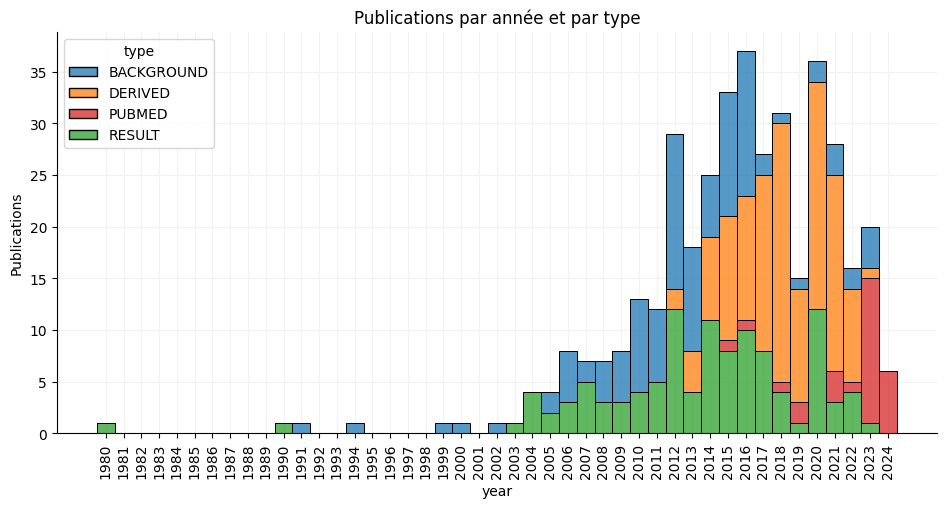

In [17]:
g = sns.histplot(
    data=df_year_type,
    x='year',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# x axis ticks
g.set_xticks(range(min_year, max_year + 1))
g.tick_params(axis='x', labelrotation=90)

# Grid
g.grid(color='0.95')
g.set_axisbelow(True)

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(title='Publications par année et par type', ylabel='Publications')

# Remove spines
sns.despine()

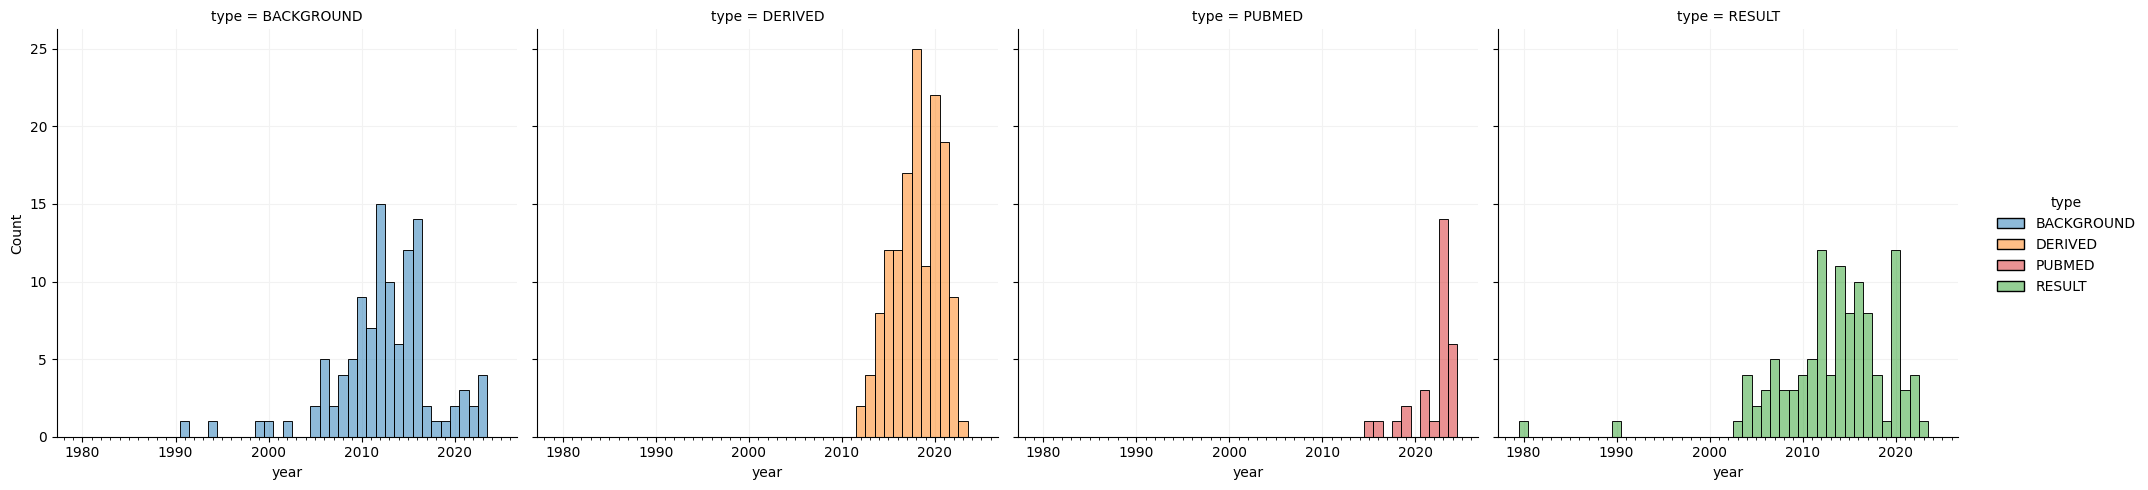

In [18]:
from matplotlib.ticker import AutoMinorLocator

g = sns.displot(
    data=df_year_type,
    x='year',
    hue='type',
    kind='hist',
    col='type',
    discrete=True,
    palette=palette,
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

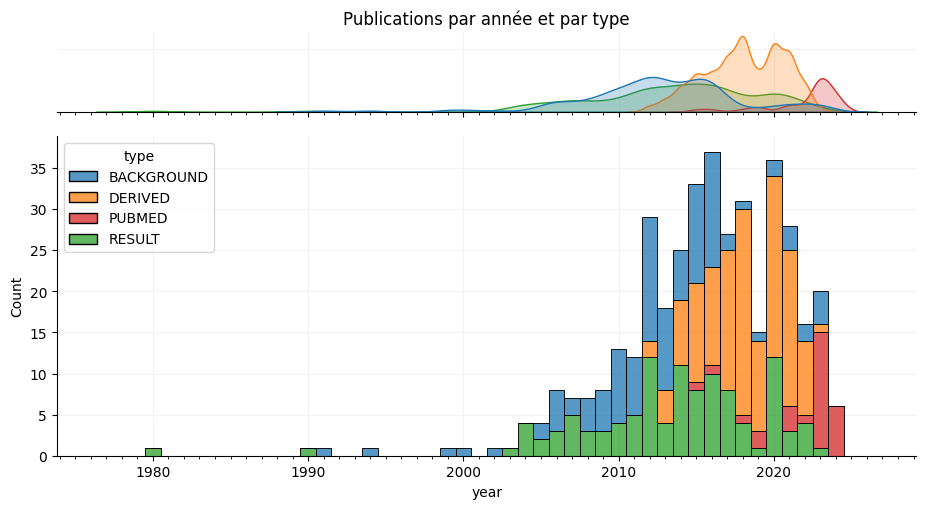

In [19]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=df_year_type,
    x='year',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=df_year_type,
    x='year',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title='Publications par année et par type', ylabel='')

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

### Interprétation :

On remarque deux valeurs extrêmes qui sont classées comme **'RESULT'** :

In [20]:
mask = df_extract.loc[:, 'year'] <= 1990
columns_to_display = [
    'NCTId',
    'BriefTitle',
    'CompletionDate',
    'pmid',
    'type',
    'title',
    'doi',
    'year',
]

df_extract.loc[mask, columns_to_display]

,NCTId,BriefTitle,CompletionDate,pmid,type,title,doi,year
195,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,2271377,RESULT,Apomorphine-induced blinking and yawning in he...,10.1111/j.1365-2125.1990.tb03848.x,1990
268,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,10.1146/annurev.ne.03.030180.001201,1980


Pour chacune de ces études, toutes leurs publications sont classées comme **'RESULT'**:

In [21]:
nctids = df_extract.loc[mask, 'NCTId']

In [22]:
mask_0 = (df_extract.loc[:, 'NCTId'] == nctids.iloc[0])

df_extract.loc[mask_0, columns_to_display]

,NCTId,BriefTitle,CompletionDate,pmid,type,title,doi,year
195,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,2271377,RESULT,Apomorphine-induced blinking and yawning in he...,10.1111/j.1365-2125.1990.tb03848.x,1990
196,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,12914551,RESULT,Pharmacokinetic-pharmacodynamic study of apomo...,10.1046/j.1472-8206.2003.00152.x,2003
197,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,15037514,RESULT,Effect of acute and chronic lamotrigine on bas...,10.1038/sj.bjp.0705737,2004
198,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,15777732,RESULT,"Lamotrigine, carbamazepine and phenytoin diffe...",10.1016/j.eplepsyres.2005.02.002,2005
199,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2014-12-01,15249613,RESULT,PET evidence for a role of the basal ganglia i...,10.1212/01.wnl.0000132840.40838.13,2004


In [23]:
mask_1 = (df_extract.loc[:, 'NCTId'] == nctids.iloc[1])

df_extract.loc[mask_1, columns_to_display]

,NCTId,BriefTitle,CompletionDate,pmid,type,title,doi,year
268,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,10.1146/annurev.ne.03.030180.001201,1980
269,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,22639796,RESULT,Linking visual response properties in the supe...,10.1111/j.1460-9568.2012.08079.x,2012
270,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2018-01-19,23916713,RESULT,Enhanced visual responses in the superior coll...,10.1016/j.neuroscience.2013.07.047,2013


**Certaine etudes cliniques classent toutes les publications associées comme 'RESULT', on ne peut donc pas se fier a cette valeur**

Les etudes dont toutes les publications sont de type 'RESULT' :

In [24]:
nctids = df_extract.loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_extract.loc[:, 'NCTId'] == nctid
    if (df_extract.loc[mask, 'type'] == 'RESULT').all():
        res.append(nctid)
print(res)
print(f'{len(res)=}')

['NCT01882062', 'NCT01490489', 'NCT04470648', 'NCT01432821', 'NCT02488395', 'NCT02916732', 'NCT03235258']
len(res)=7


In [25]:
df_extract.loc[df_extract.loc[:, 'NCTId'].isin(res), ['NCTId', 'type']].head(10)

,NCTId,type
12,NCT01882062,RESULT
45,NCT01490489,RESULT
46,NCT01490489,RESULT
47,NCT01490489,RESULT
91,NCT04470648,RESULT
92,NCT04470648,RESULT
93,NCT04470648,RESULT
94,NCT04470648,RESULT
95,NCT04470648,RESULT
96,NCT04470648,RESULT


## Délai entre la publication et la fin de l'étude :

In [26]:
df_completion_date = df_extract.loc[:, ['NCTId', 'type', 'CompletionDate', 'year']].dropna()
df_completion_date

,NCTId,type,CompletionDate,year
3,NCT02777229,PUBMED,2021-07-01,2023
4,NCT02777229,DERIVED,2021-07-01,2020
5,NCT02777229,DERIVED,2021-07-01,2021
6,NCT02777229,DERIVED,2021-07-01,2019
7,NCT02777229,PUBMED,2021-07-01,2023
...,...,...,...,...
489,NCT01492985,DERIVED,2017-04-08,2021
494,NCT01037777,DERIVED,2017-12-14,2014
495,NCT01037777,DERIVED,2017-12-14,2022
496,NCT01037777,DERIVED,2017-12-14,2020


In [27]:
time_completion_publication = df_completion_date.loc[:, 'year'] - df_completion_date.loc[:, 'CompletionDate'].dt.year.astype('Int64')
time_completion_publication = time_completion_publication.rename('TimeCompletionPublication')
time_completion_publication = df_completion_date.loc[:, ['NCTId', 'type', 'CompletionDate', 'year']].join(time_completion_publication)
time_completion_publication

,NCTId,type,CompletionDate,year,TimeCompletionPublication
3,NCT02777229,PUBMED,2021-07-01,2023,2
4,NCT02777229,DERIVED,2021-07-01,2020,-1
5,NCT02777229,DERIVED,2021-07-01,2021,0
6,NCT02777229,DERIVED,2021-07-01,2019,-2
7,NCT02777229,PUBMED,2021-07-01,2023,2
...,...,...,...,...,...
489,NCT01492985,DERIVED,2017-04-08,2021,4
494,NCT01037777,DERIVED,2017-12-14,2014,-3
495,NCT01037777,DERIVED,2017-12-14,2022,5
496,NCT01037777,DERIVED,2017-12-14,2020,3


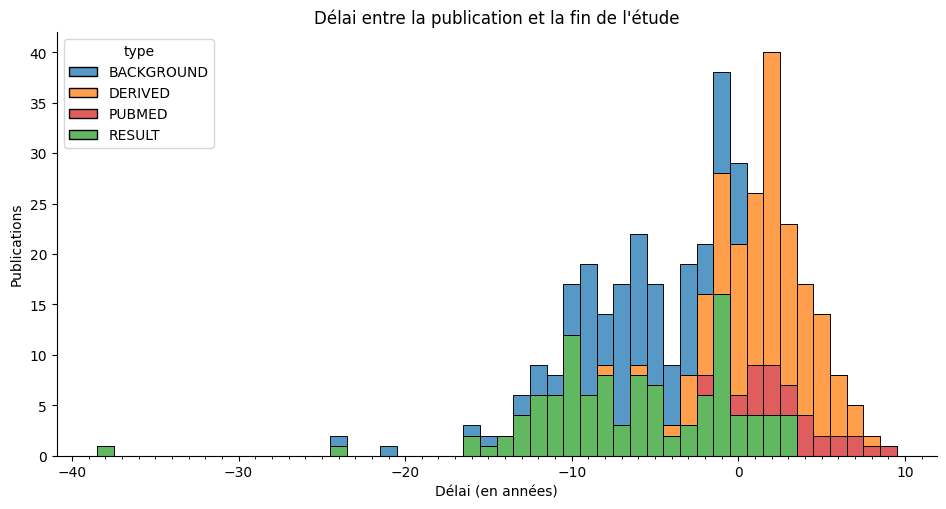

In [28]:
g = sns.histplot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    multiple='stack',
    # element="step",
    discrete=True,
    palette=palette,
)

# x axis ticks
g.xaxis.set_minor_locator(AutoMinorLocator(10))

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(
    title="Délai entre la publication et la fin de l'étude",
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()

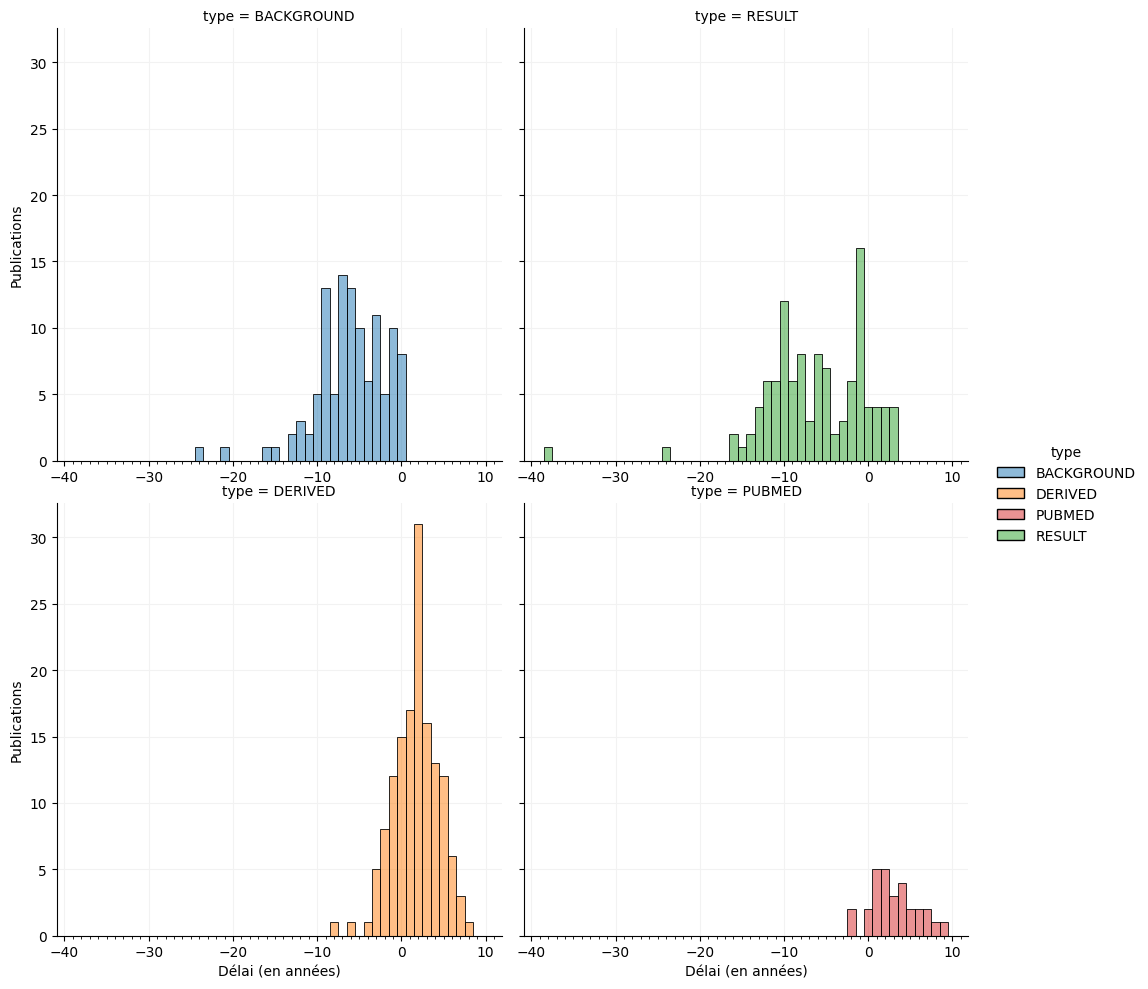

In [29]:
g = sns.displot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    col='type',
    col_order=['BACKGROUND', 'RESULT', 'DERIVED', 'PUBMED'],
    col_wrap=2,
    discrete=True,
    kind='hist',
    palette=palette,
)

g.tick_params(labelbottom=True)
g.set_axis_labels('Délai (en années)', 'Publications')

for ax in g.axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

**Problablement des publications de type 'RESULT' parmis les 'DERIVED'**

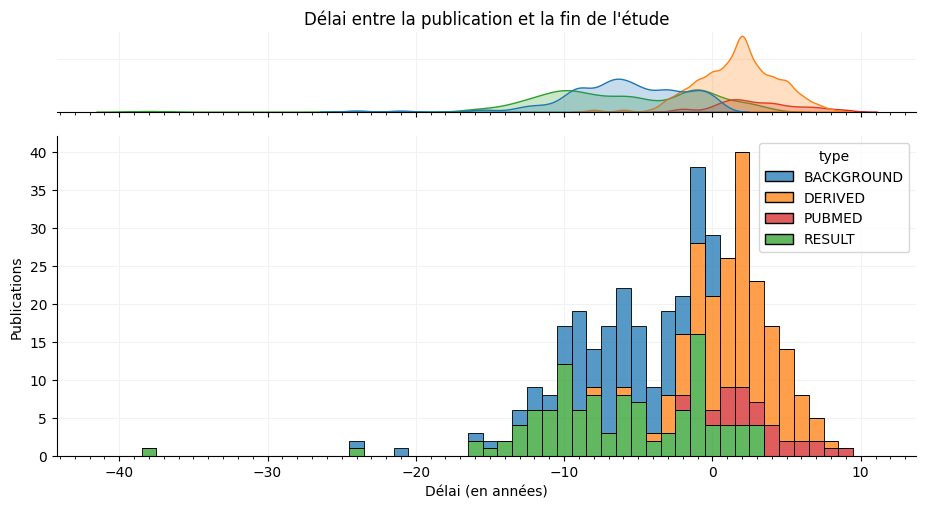

In [30]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title="Délai entre la publication et la fin de l'étude", ylabel='')
axes[1].set(
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

In [31]:
# for type in ['BACKGROUND', 'DERIVED', 'PUBMED', 'RESULT']:
#     mask_type = (time_completion_publication.loc[:, 'type'] == type)
#     df_type = time_completion_publication.loc[mask_type, 'TimeCompletionPublication']
#     df_type = df_type.reindex(time_completion_publication.index)

#     axs = df_type.plot.barh(
#         # x = time_completion_publication.index,
#         y = 'TimeCompletionPublication',
#         figsize = (5, 20),
#         color = palette[type],
#     )

# axs.invert_yaxis()
# axs.yaxis.set_visible(False)
# axs.set_frame_on(False)

# # Title
# axs.set(
#     xlabel='Délai (en années)'
# )

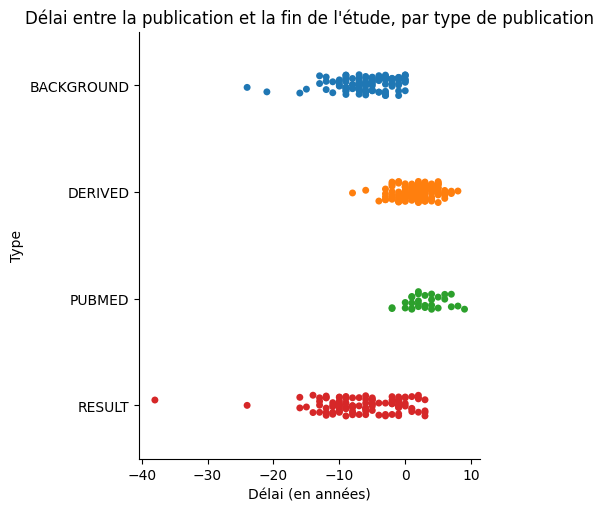

In [32]:
g = sns.catplot(
    data=time_completion_publication.dropna(),
    x='TimeCompletionPublication',
    y='type',
    hue='type',
    jitter=True,
)

# Title
g.set(
    title="Délai entre la publication et la fin de l'étude, par type de publication",
    xlabel='Délai (en années)',
    ylabel='Type',
)

## Délai entre la publication et le début de l'étude :

In [33]:
df_start_date = df_extract.loc[:, ['NCTId', 'pmid', 'type', 'StartDate', 'year']].dropna()
df_start_date

,NCTId,pmid,type,StartDate,year
3,NCT02777229,38156046,PUBMED,2016-07-01,2023
4,NCT02777229,33010241,DERIVED,2016-07-01,2020
5,NCT02777229,33355914,DERIVED,2016-07-01,2021
6,NCT02777229,31339676,DERIVED,2016-07-01,2019
7,NCT02777229,37851566,PUBMED,2016-07-01,2023
...,...,...,...,...,...
489,NCT01492985,33568510,DERIVED,2013-07-01,2021
494,NCT01037777,24780882,DERIVED,2009-05-07,2014
495,NCT01037777,35264424,DERIVED,2009-05-07,2022
496,NCT01037777,32822634,DERIVED,2009-05-07,2020


In [34]:
time_start_publication = df_start_date.loc[:, 'year'] - df_start_date.loc[:, 'StartDate'].dt.year.astype('Int64')
time_start_publication = time_start_publication.rename('TimeStartPublication')
time_start_publication = df_start_date.join(time_start_publication)
time_start_publication

,NCTId,pmid,type,StartDate,year,TimeStartPublication
3,NCT02777229,38156046,PUBMED,2016-07-01,2023,7
4,NCT02777229,33010241,DERIVED,2016-07-01,2020,4
5,NCT02777229,33355914,DERIVED,2016-07-01,2021,5
6,NCT02777229,31339676,DERIVED,2016-07-01,2019,3
7,NCT02777229,37851566,PUBMED,2016-07-01,2023,7
...,...,...,...,...,...,...
489,NCT01492985,33568510,DERIVED,2013-07-01,2021,8
494,NCT01037777,24780882,DERIVED,2009-05-07,2014,5
495,NCT01037777,35264424,DERIVED,2009-05-07,2022,13
496,NCT01037777,32822634,DERIVED,2009-05-07,2020,11


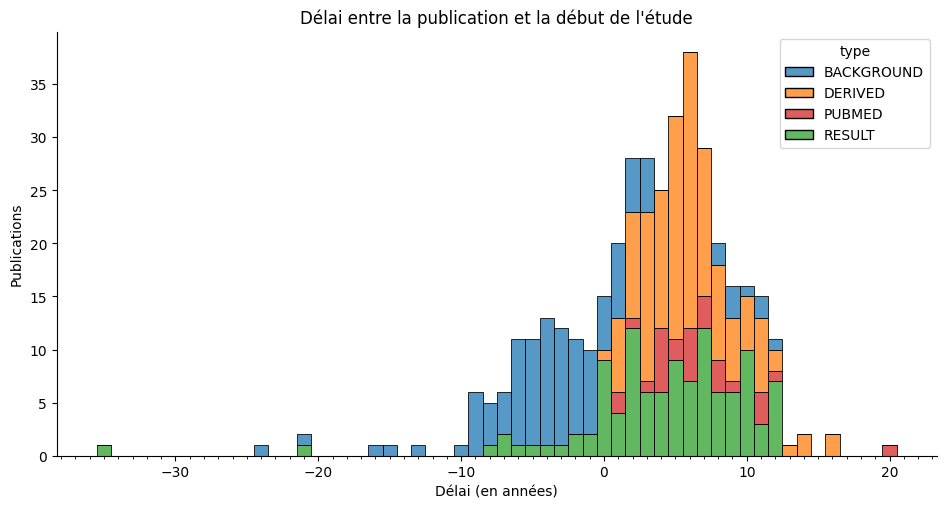

In [35]:
g = sns.histplot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    multiple='stack',
    # element="step",
    discrete=True,
    palette=palette,
)

# x axis ticks
g.xaxis.set_minor_locator(AutoMinorLocator(10))

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(
    title="Délai entre la publication et la début de l'étude",
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()

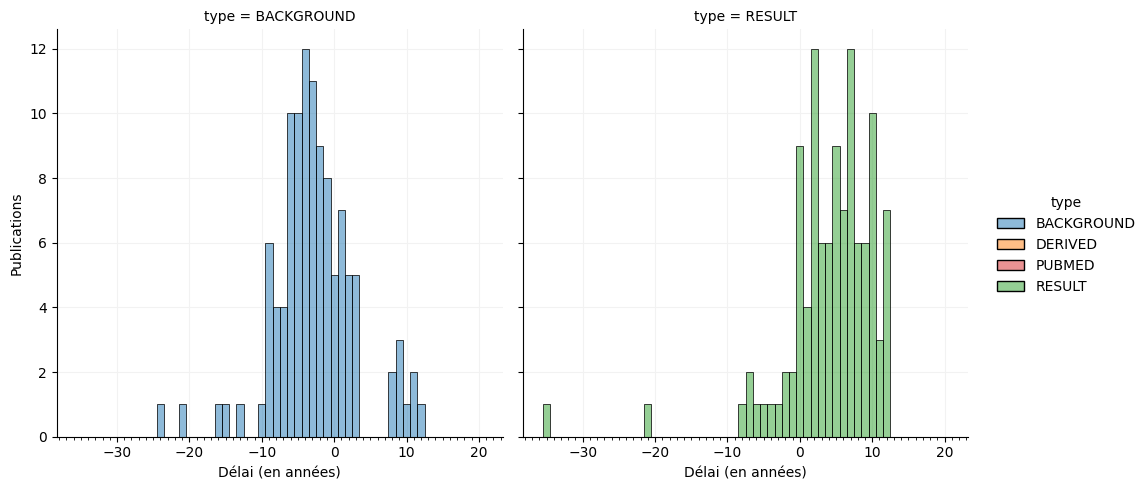

In [36]:
g = sns.displot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    col='type',
    col_order=['BACKGROUND', 'RESULT'],
    discrete=True,
    kind='hist',
    palette=palette,
)
# g.set_ylabels('Publications')

# Title
g.set(
    xlabel='Délai (en années)',
    ylabel='Publications',
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

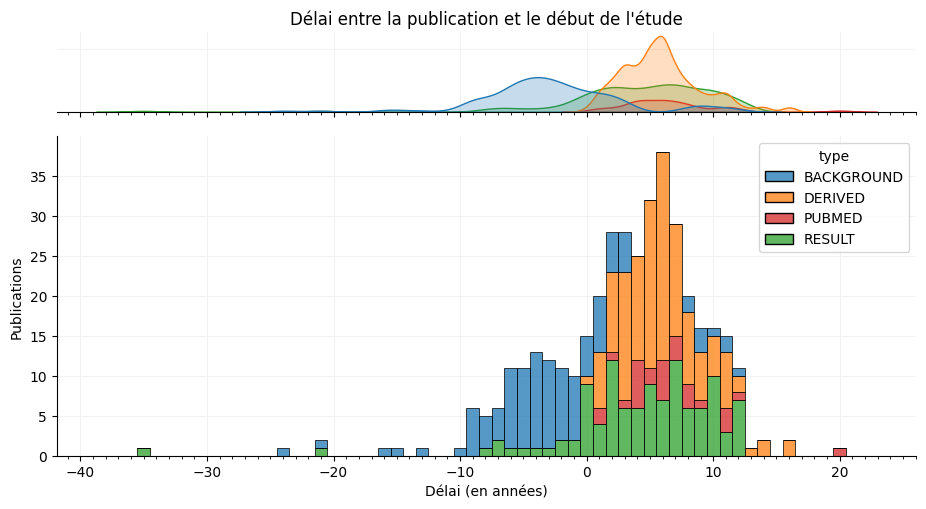

In [37]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title="Délai entre la publication et le début de l'étude", ylabel='')
axes[1].set(
    xlabel='Délai (en années)',
    ylabel='Publications',
)

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

### Interprétation :

**Les publications de type 'RESULT' avant la date de début de l'étude sont problématiques -> Les passer en type 'SUSPICIOUS' ?**

**Le cluster de publications de type 'BACKGROUND' 10 ans après le début des études est suspect.**  S'agit-il de 'RESULT' ?

Publications de type 'RESULT' dont la date de publication est antérieur à la date de début de l'essai clinique :

In [38]:
mask_result = df_extract.loc[:, 'type'] == 'RESULT'
mask_time_neg = df_extract.loc[:, 'year'] < df_extract.loc[:, 'StartDate'].dt.year

df_extract.loc[mask_result & mask_time_neg, ['NCTId', 'pmid', 'type', 'StartDate', 'year']]

,NCTId,pmid,type,StartDate,year
45,NCT01490489,16384869,RESULT,2011-07-11,2006
46,NCT01490489,17531315,RESULT,2011-07-11,2007
47,NCT01490489,19602057,RESULT,2011-07-11,2009
140,NCT00136630,15313841,RESULT,2005-05-01,2004
146,NCT00136630,15365159,RESULT,2005-05-01,2004
195,NCT01432821,2271377,RESULT,2011-09-01,1990
196,NCT01432821,12914551,RESULT,2011-09-01,2003
197,NCT01432821,15037514,RESULT,2011-09-01,2004
198,NCT01432821,15777732,RESULT,2011-09-01,2005
199,NCT01432821,15249613,RESULT,2011-09-01,2004


On remarque que juste quelques d'études concentrent ces publications problématiques :

In [39]:
nctids = df_extract.loc[mask_result & mask_time_neg].loc[:, 'NCTId'].unique()
nctids

<StringArray>
['NCT01490489', 'NCT00136630', 'NCT01432821', 'NCT02488395']
Length: 4, dtype: string

Ces etudes cliniques semblent classer toutes leurs publications comme 'RESULT' :

In [40]:
df_extract.loc[df_extract.loc[:, 'NCTId'].isin(nctids), ['NCTId', 'type']]

,NCTId,type
45,NCT01490489,RESULT
46,NCT01490489,RESULT
47,NCT01490489,RESULT
136,NCT00136630,DERIVED
137,NCT00136630,RESULT
138,NCT00136630,RESULT
139,NCT00136630,RESULT
140,NCT00136630,RESULT
141,NCT00136630,RESULT
142,NCT00136630,RESULT


### Les publications de type 'RESULT' avant la date de début de l'étude sont problématique, on les passe en type 'SUSPICIOUS' :

In [41]:
df_extract.loc[mask_result & mask_time_neg, ['NCTId', 'pmid', 'type', 'StartDate', 'year']]

,NCTId,pmid,type,StartDate,year
45,NCT01490489,16384869,RESULT,2011-07-11,2006
46,NCT01490489,17531315,RESULT,2011-07-11,2007
47,NCT01490489,19602057,RESULT,2011-07-11,2009
140,NCT00136630,15313841,RESULT,2005-05-01,2004
146,NCT00136630,15365159,RESULT,2005-05-01,2004
195,NCT01432821,2271377,RESULT,2011-09-01,1990
196,NCT01432821,12914551,RESULT,2011-09-01,2003
197,NCT01432821,15037514,RESULT,2011-09-01,2004
198,NCT01432821,15777732,RESULT,2011-09-01,2005
199,NCT01432821,15249613,RESULT,2011-09-01,2004


On change le type en 'SUSPICIOUS':

In [42]:
# Copy previous df
df_corrected = df_extract.copy()

# Add new 'SUSPICIOUS' category
df_corrected['type'] = df_corrected['type'].cat.add_categories('SUSPICIOUS').astype('category')

# Change type to 'SUSPICIOUS'
df_corrected.loc[mask_result & mask_time_neg, 'type'] = 'SUSPICIOUS'

On vérifie que les publications concernées ont bien le nouveau 'type': 

In [43]:
# Make sure df_corrected and time_start_publication have the same index for the join
df_corrected.loc[mask_result & mask_time_neg, ['NCTId', 'pmid', 'type']].join(
    time_start_publication.loc[:, 'TimeStartPublication']
)

,NCTId,pmid,type,TimeStartPublication
45,NCT01490489,16384869,SUSPICIOUS,-5
46,NCT01490489,17531315,SUSPICIOUS,-4
47,NCT01490489,19602057,SUSPICIOUS,-2
140,NCT00136630,15313841,SUSPICIOUS,-1
146,NCT00136630,15365159,SUSPICIOUS,-1
195,NCT01432821,2271377,SUSPICIOUS,-21
196,NCT01432821,12914551,SUSPICIOUS,-8
197,NCT01432821,15037514,SUSPICIOUS,-7
198,NCT01432821,15777732,SUSPICIOUS,-6
199,NCT01432821,15249613,SUSPICIOUS,-7


### Les publications de type 'BACKGROUND' après la date de fin de l'étude sont problématiques, on veut les passer en 'SUSPICIOUS' :

<span style="color:red">**En limitant aux études dont la date de fin d'étude supérieure ou égale à 2013, on a éliminé les études avec des publications de type 'BACKGROUND' après la date de fin de l'étude.  
Cette partie est donc inutile et laissé pour info.**</span>

In [44]:
mask_background = df_extract.loc[:, 'type'] == 'BACKGROUND'
mask_time_pos = df_extract.loc[:, 'year'] > df_extract.loc[:, 'CompletionDate'].dt.year

df_extract.loc[mask_background & mask_time_pos, ['NCTId', 'pmid', 'type', 'StartDate', 'year']]

,NCTId,pmid,type,StartDate,year


On change le type en 'SUSPICIOUS':

In [45]:
# change type to 'SUSPICIOUS'
df_corrected.loc[mask_background & mask_time_pos, 'type'] = 'SUSPICIOUS'

## Durée des études cliniques :

In [46]:
df_start_completion = df_extract.drop_duplicates(subset = 'NCTId').loc[:, ['NCTId', 'StartDate', 'CompletionDate']].dropna()
df_start_completion

,NCTId,StartDate,CompletionDate
0,NCT03671291,2019-04-03,2021-10-03
1,NCT00323804,2006-05-01,2013-03-01
2,NCT02267304,2013-10-30,2016-08-30
3,NCT02777229,2016-07-01,2021-07-01
8,NCT01066962,2010-08-01,2013-10-01
...,...,...,...
490,NCT04120415,2022-06-21,2023-07-12
491,NCT01269632,2010-06-01,2018-12-27
492,NCT02102737,2014-05-13,2018-03-01
493,NCT01842477,2013-05-01,2016-02-05


In [47]:
time_study_duration = (
    df_start_completion.loc[:, 'CompletionDate'] 
    - df_start_completion.loc[:, 'StartDate']
)
time_study_duration = time_study_duration.rename('StudyDuration')
time_study_duration = df_start_completion.join(time_study_duration)
time_study_duration

,NCTId,StartDate,CompletionDate,StudyDuration
0,NCT03671291,2019-04-03,2021-10-03,914 days
1,NCT00323804,2006-05-01,2013-03-01,2496 days
2,NCT02267304,2013-10-30,2016-08-30,1035 days
3,NCT02777229,2016-07-01,2021-07-01,1826 days
8,NCT01066962,2010-08-01,2013-10-01,1157 days
...,...,...,...,...
490,NCT04120415,2022-06-21,2023-07-12,386 days
491,NCT01269632,2010-06-01,2018-12-27,3131 days
492,NCT02102737,2014-05-13,2018-03-01,1388 days
493,NCT01842477,2013-05-01,2016-02-05,1010 days


In [48]:
time_study_duration.loc[:, 'StudyDuration'].describe()

count                             200
mean               1323 days 15:36:00
std      1157 days 12:28:43.868490192
min                  61 days 00:00:00
25%                 691 days 18:00:00
50%                1083 days 12:00:00
75%                1522 days 00:00:00
max                7762 days 00:00:00
Name: StudyDuration, dtype: object

In [49]:
# In years instead of days
time_study_duration.loc[:, 'StudyDuration'].apply(lambda x: x.days/365.25).describe()

count    200.000000
mean       3.623956
std        3.169117
min        0.167009
25%        1.893908
50%        2.966461
75%        4.167009
max       21.251198
Name: StudyDuration, dtype: float64

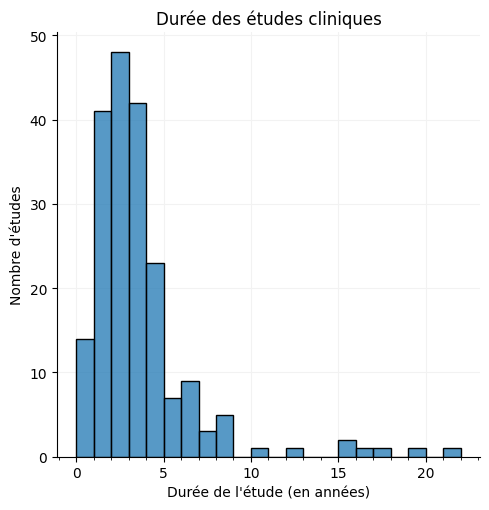

In [50]:
g = sns.displot(
    time_study_duration, 
    x = time_study_duration.loc[:, 'StudyDuration'].apply(lambda x: x.days/365.25),
    bins = range(0,23),
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))

# Title
g.set(
    title = "Durée des études cliniques",
    xlabel = "Durée de l'étude (en années)",
    ylabel = "Nombre d'études",
)

## Statistiques :

#### Nombre d'études cliniques:

In [51]:
num_trials = len(df_corrected.loc[:, 'NCTId'].unique())
num_trials

200

#### Nombre de publications :

In [52]:
num_publications = df_corrected.loc[:, 'pmid'].notna().sum()
num_publications

392

#### Nombre de publications par types :

In [53]:
df_corrected.loc[:, 'type'].value_counts()

type
DERIVED       142
BACKGROUND    111
RESULT         97
PUBMED         29
SUSPICIOUS     13
Name: count, dtype: int64

#### Nombre d'études sans publications :

In [54]:
num_trials_wo_pub = len(df_corrected.loc[df_corrected.loc[:, 'pmid'].isna(), 'NCTId'])
print("Nombre d'études sans publications:")
print(f"{num_trials_wo_pub} / {num_trials} ({num_trials_wo_pub / num_trials:.2%})")

Nombre d'études sans publications:
106 / 200 (53.00%)


#### Nombre d'études avec au moins une publication :

In [55]:
num_trials_with_pub = len(df_corrected.loc[df_corrected.loc[:, 'pmid'].notna(), 'NCTId'].unique())
print("Nombre d'études avec au moins une publication :")
print(f"{num_trials_with_pub} / {num_trials} ({num_trials_with_pub / num_trials:.2%})")

Nombre d'études avec au moins une publication :
94 / 200 (47.00%)


In [56]:
assert num_trials == (num_trials_wo_pub + num_trials_with_pub)

#### Nombre d'études avec au moins une publication de type 'RESULT' :

In [57]:
num_trials_with_res = len(
    df_corrected.loc[(df_corrected.loc[:, 'type'] == 'RESULT'), 'NCTId'].unique()
)

In [58]:
print("Nombre d'études avec au moins une publication de type 'RESULT' :")
print(f"{num_trials_with_res} / {num_trials} ({num_trials_with_res / num_trials:.2%})")

Nombre d'études avec au moins une publication de type 'RESULT' :
10 / 200 (5.00%)


**Un nombre très faible d'études déclarent des résultats de type 'RESULT'.**  
Parmis ces études, un nombre encore plus faible concentrent la majorité des publications déclarées comme 'RESULT'.

In [59]:
df_corrected.loc[(df_extract.loc[:, 'type'] == 'RESULT'), 'NCTId'].value_counts()

NCTId
NCT03324633    34
NCT01546181    19
NCT03235258    12
NCT00136630    11
NCT04470648     8
NCT04315948     7
NCT01432821     5
NCT02573948     4
NCT01490489     3
NCT02488395     3
NCT02916732     2
NCT01882062     1
NCT02329054     1
Name: count, dtype: Int64

#### Nombre d'études avec au moins une publication autre que 'BACKGROUND' :

In [60]:
# Unique NCTIDs with with publication type other than <NA>
nctids = df_corrected.loc[:, ['NCTId', 'type']].dropna().loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = (df_corrected.loc[:, 'NCTId'] == nctid)
    if ~((df_corrected.loc[mask, 'type'] == 'BACKGROUND').all()):
        res.append(nctid)
        
print("Nombre d'études avec au moins une publication autre que 'BACKGROUND' :")
print(f"{len(res)} / {num_trials} ({len(res) / num_trials:.2%})")

Nombre d'études avec au moins une publication autre que 'BACKGROUND' :
88 / 200 (44.00%)


Etudes dont toutes les publications sont de type 'BACKGROUND':

In [61]:
# Unique NCTIDs with with publication type other than <NA>
nctids = df_corrected.loc[:, ['NCTId', 'type']].dropna().loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = (df_corrected.loc[:, 'NCTId'] == nctid)
    if (df_corrected.loc[mask, 'type'] == 'BACKGROUND').all():
        res.append(nctid)
res

['NCT04780191',
 'NCT02738502',
 'NCT02496312',
 'NCT03519503',
 'NCT03137797',
 'NCT02656407']

## Export pour un traitement manuel

On a constaté qu'on ne peut pas se fier aux données récupérées automatiquement, notamment le type de publications.  
Il va falloir faire une vérification manuelle.

#### Export en CSV:

In [62]:
columns_to_export = ['NCTId', 'BriefTitle', 'HasResults', 'type', 'doi', 'pmid', 'year']
df_corrected.loc[:, columns_to_export]

,NCTId,BriefTitle,HasResults,type,doi,pmid,year
0,NCT03671291,Missed Opportunities to Pre-exposure Prophylax...,False,NaN,<NA>,<NA>,<NA>
1,NCT00323804,Interest of Ribavirin in the Maintenance Treat...,False,NaN,<NA>,<NA>,<NA>
2,NCT02267304,"Double Blind Randomized, Monocentric, Cross-ov...",False,NaN,<NA>,<NA>,<NA>
3,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,False,PUBMED,10.1093/ofid/ofad582,38156046,2023
4,NCT02777229,Efficacy and Safety of a Dolutegravir-based Re...,False,DERIVED,10.1016/S2352-3018(20)30238-1,33010241,2020
...,...,...,...,...,...,...,...
493,NCT01842477,Evaluation of Efficacy and Safety of Autologou...,False,NaN,<NA>,<NA>,<NA>
494,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,False,DERIVED,10.1136/jmedgenet-2013-102200,24780882,2014
495,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,False,DERIVED,10.1212/WNL.0000000000200257,35264424,2022
496,NCT01037777,RISCA : Prospective Study of Individuals at Ri...,False,DERIVED,10.1016/S1474-4422(20)30235-0,32822634,2020


In [64]:
df_corrected.loc[:, columns_to_export].to_csv(
    'Data/outputs/df_results.csv',
    columns = columns_to_export,
    sep=';',
    index=False,
    encoding='utf-8-sig',
)

In [ ]:
# TODO: export to Excel with appropriate treatment:
# - alternate row shading based on NCTId
# - pmid_link to Pubmed
# - color green 'HasResult'
# - color red 'SUSPICIOUS' type
# - bold type 'RESULT' type
# - header
# - hide doi ?